In [1]:
pip install tensorflow

In [20]:
import tensorflow as tf 
import numpy as np 
from tensorflow import keras 
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt 
from sklearn.metrics import classification_report

In [7]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.cifar10.load_data()

In [12]:
train_imgs = train_imgs.reshape(-1, 32*32*3).astype("float32") / 255.0
test_imgs = test_imgs.reshape(-1, 32*32*3).astype("float32") / 255.0

In [13]:
train_labels_OH = to_categorical(train_labels)
test_labels_OH = to_categorical(test_labels)

In [55]:
model = keras.Sequential([layers.Dense(40, input_dim= 32*32*3, activation='relu'),
                         layers.Dense(60, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')])
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
model_data = model.fit(train_imgs, train_labels_OH, validation_data=(test_imgs, test_labels_OH), batch_size = 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3023 - accuracy: 0.1056 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3021 - accuracy: 0.1045 - val_loss: 2.3019 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3019 - accuracy: 0.1084 - val_loss: 2.3016 - val_accuracy: 0.1176
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1187 - val_loss: 2.3011 - val_accuracy: 0.1355
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3010 - accuracy: 0.1192 - val_loss: 2.3008 - val_accuracy: 0.1430
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.3006 - accuracy: 0.1219 - val_loss: 2.3002 - val_accuracy:

In [66]:
def plot_results(model_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.set_title("Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.plot(model_data.history['accuracy'], label="train")
    ax1.plot(model_data.history['val_accuracy'], label="test")
    ax1.legend()
    ax2.set_title("Loss")
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Epoch")
    ax2.plot(model_data.history['loss'], label="train")
    ax2.plot(model_data.history['val_loss'], label="test")
    ax2.legend()
    plt.show()

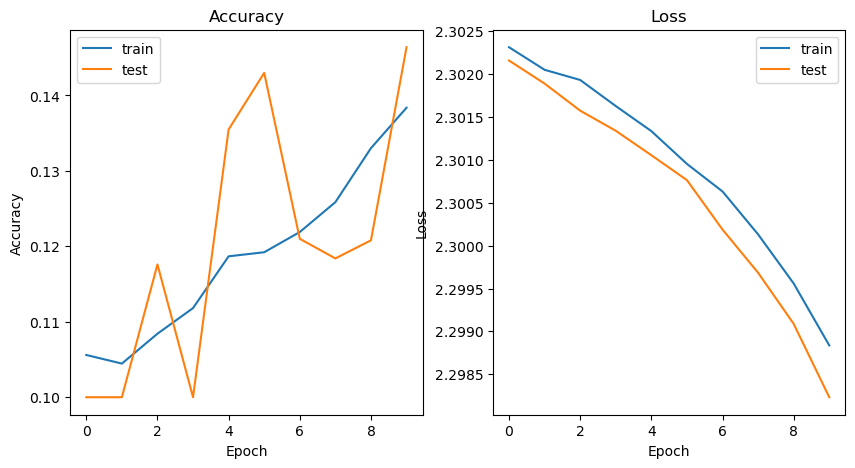

In [67]:
plot_results(model_data)

In [68]:
def class_report(model, train_imgs, train_labels, test_imgs, test_labels):
    prediction_train = model.predict(train_imgs)
    prediction_train = np.argmax(prediction_train, axis=1)
    prediction_test = model.predict(test_imgs)
    prediction_test = np.argmax(prediction_test, axis=1)
    print("Train:")
    print(classification_report(train_labels, prediction_train))
    print("Test:")
    print(classification_report(test_labels, prediction_test))

In [69]:
class_report(model, train_imgs, train_labels, test_imgs, test_labels)

313/313 [==============================] - 0s 2ms/step
Train:
              precision    recall  f1-score   support

           0       0.14      0.86      0.24      5000
           1       0.00      0.00      0.00      5000
           2       0.00      0.00      0.00      5000
           3       0.22      0.00      0.00      5000
           4       0.14      0.56      0.23      5000
           5       0.00      0.00      0.00      5000
           6       0.19      0.01      0.01      5000
           7       0.00      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.00      0.00      0.00      5000

    accuracy                           0.14     50000
   macro avg       0.07      0.14      0.05     50000
weighted avg       0.07      0.14      0.05     50000

Test:
              precision    recall  f1-score   support

           0       0.14      0.89      0.25      1000
           1       0.00      0.00      0.00      1000
          

D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.

In [87]:
model2 = keras.Sequential([layers.Dense(40, input_dim= 32*32*3, activation='tanh'),
                         layers.Dense(80, activation = 'tanh'),
                         layers.Dense(10, activation = 'softmax')])
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.2), loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
model_data2 = model2.fit(train_imgs, train_labels_OH, validation_data=(test_imgs, test_labels_OH), batch_size = 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2989 - accuracy: 0.1122 - val_loss: 2.2680 - val_accuracy: 0.1314
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2309 - accuracy: 0.1476 - val_loss: 2.2012 - val_accuracy: 0.1501
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.1739 - accuracy: 0.1801 - val_loss: 2.3031 - val_accuracy: 0.1382
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.1313 - accuracy: 0.2015 - val_loss: 2.1887 - val_accuracy: 0.1576
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0997 - accuracy: 0.2181 - val_loss: 2.0505 - val_accuracy: 0.2456
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0743 - accuracy: 0.2318 - val_loss: 2.0840 - val_accuracy: 0.2271
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0569 - accuracy: 0.2410 - val_loss: 2.0276 - val_accuracy:

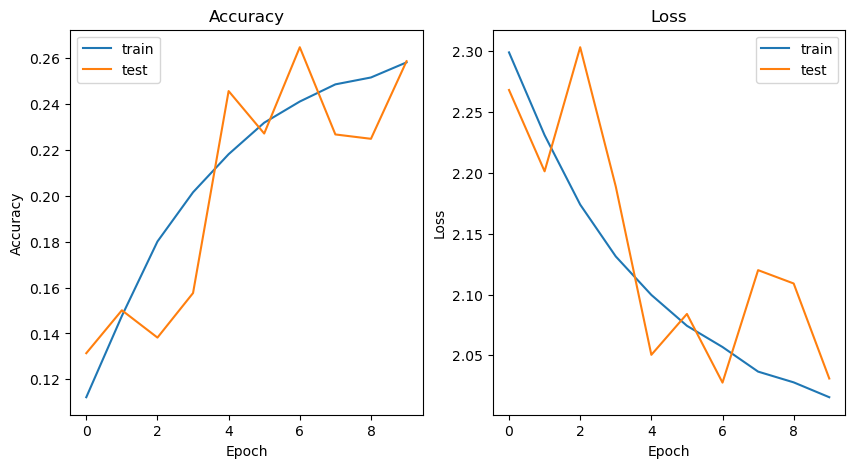

313/313 [==============================] - 0s 1ms/step
Train:
              precision    recall  f1-score   support

           0       0.40      0.38      0.39      5000
           1       0.37      0.13      0.19      5000
           2       0.14      0.29      0.19      5000
           3       0.12      0.01      0.01      5000
           4       0.21      0.41      0.27      5000
           5       0.41      0.07      0.12      5000
           6       0.24      0.34      0.28      5000
           7       0.21      0.30      0.25      5000
           8       0.54      0.13      0.21      5000
           9       0.37      0.49      0.42      5000

    accuracy                           0.25     50000
   macro avg       0.30      0.25      0.23     50000
weighted avg       0.30      0.25      0.23     50000

Test:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1000
           1       0.40      0.14      0.21      1000
          

In [88]:
plot_results(model_data2)
class_report(model2, train_imgs, train_labels, test_imgs, test_labels)

We need epoches to help train our algorithm. Once isn't enough to properly train it and so we run it multiple times and update the weights to make sure it's more accurate than not. 

If our epoch is too high, then problems such as overfitting will rise. Meaning that it'll be great on our training data but terrible on our test data. We can always decrease the epoch number, increase our training data, and decrease our parameters. 

In [90]:
model3 = keras.Sequential([layers.Dense(40, input_dim= 32*32*3, activation='relu'),
                         layers.Dense(90, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')])
model3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.mean_squared_error, metrics=["accuracy"])
model_data3 = model2.fit(train_imgs, train_labels_OH, validation_data=(test_imgs, test_labels_OH), batch_size = 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9740 - accuracy: 0.2762 - val_loss: 1.9592 - val_accuracy: 0.2766
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9685 - accuracy: 0.2806 - val_loss: 2.1583 - val_accuracy: 0.2257
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9627 - accuracy: 0.2841 - val_loss: 1.9384 - val_accuracy: 0.2810
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9528 - accuracy: 0.2873 - val_loss: 2.0641 - val_accuracy: 0.2345
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9409 - accuracy: 0.2934 - val_loss: 1.9636 - val_accuracy: 0.2804
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9359 - accuracy: 0.2946 - val_loss: 1.9974 - val_accuracy: 0.2622
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9324 - accuracy: 0.2961 - val_loss: 1.9146 - val_accuracy:

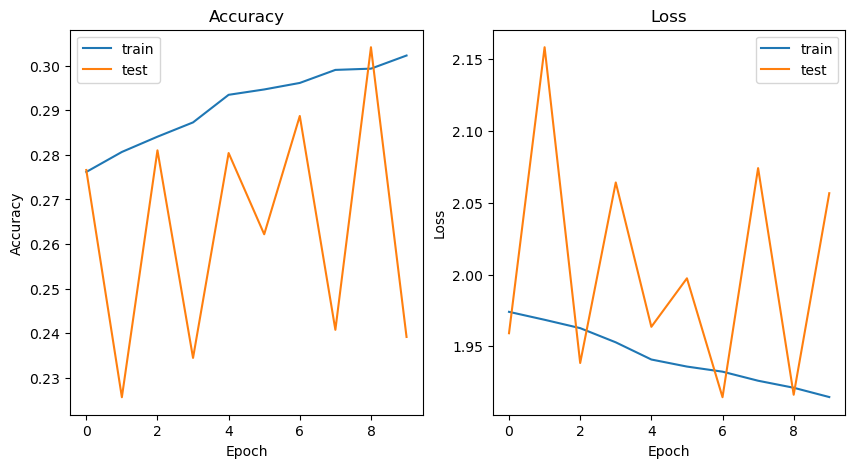

313/313 [==============================] - 0s 1ms/step
Train:
              precision    recall  f1-score   support

           0       0.11      0.00      0.00      5000
           1       0.10      0.01      0.02      5000
           2       0.11      0.16      0.13      5000
           3       0.00      0.00      0.00      5000
           4       0.13      0.00      0.00      5000
           5       0.09      0.73      0.16      5000
           6       0.10      0.02      0.04      5000
           7       0.05      0.00      0.00      5000
           8       0.05      0.00      0.00      5000
           9       0.00      0.00      0.00      5000

    accuracy                           0.09     50000
   macro avg       0.07      0.09      0.03     50000
weighted avg       0.07      0.09      0.03     50000

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.12      0.01      0.02      1000
          

D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.

In [91]:
plot_results(model_data3)
class_report(model3, train_imgs, train_labels, test_imgs, test_labels)

While our accuracy with MSE data is better than categorical cross entropy, our precision, recall and f1 score are lower.

MSE does not work well with classification because it works with continous data and has continous outcomes wile classifying mostly has discrite outcomes and therefore it's better to use categorical cross entropy than MSE.

In [94]:
model4 = keras.Sequential([layers.Dense(40, input_dim= 32*32*3, activation='relu'),
                         layers.Dropout(0.1),
                         layers.Dense(90, activation = 'relu'),
                         layers.Dropout(0.1),
                         layers.Dense(10, activation = 'softmax')])
model4.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=keras.losses.mean_squared_error, metrics=["accuracy"])
model_data4 = model4.fit(train_imgs, train_labels_OH, validation_data=(test_imgs, test_labels_OH), batch_size = 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.1130 - val_loss: 0.0900 - val_accuracy: 0.1228
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0900 - accuracy: 0.1272 - val_loss: 0.0900 - val_accuracy: 0.1452
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0900 - accuracy: 0.1314 - val_loss: 0.0900 - val_accuracy: 0.1522
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.1325 - val_loss: 0.0900 - val_accuracy: 0.1518
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0900 - accuracy: 0.1330 - val_loss: 0.0900 - val_accuracy: 0.1494
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0900 - accuracy: 0.1368 - val_loss: 0.0900 - val_accuracy: 0.1476
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0900 - accuracy: 0.1384 - val_loss: 0.0900 - val_accuracy:

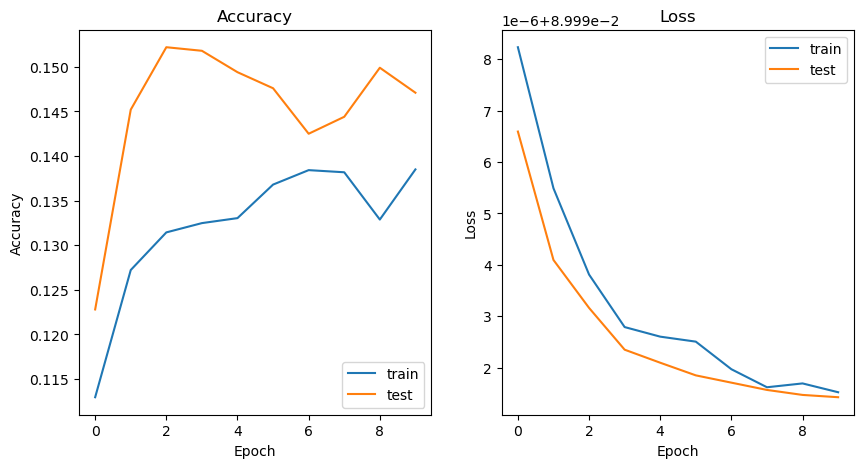

313/313 [==============================] - 0s 1ms/step
Train:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      5000
           1       0.18      0.04      0.07      5000
           2       0.11      0.00      0.00      5000
           3       0.50      0.00      0.00      5000
           4       0.00      0.00      0.00      5000
           5       0.17      0.08      0.11      5000
           6       0.13      0.85      0.23      5000
           7       0.06      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.17      0.49      0.25      5000

    accuracy                           0.15     50000
   macro avg       0.23      0.15      0.07     50000
weighted avg       0.23      0.15      0.07     50000

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.17      0.04      0.06      1000
          

D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Jupyter Notebook\lib\site-packages\sklearn\metrics\_classification.

In [95]:
plot_results(model_data4)
class_report(model4, train_imgs, train_labels, test_imgs, test_labels)

There has been no significant changes after using the dropout layer.